# Serving Model with Tensorflow

![image](https://images.unsplash.com/photo-1519881965905-ad3bc8c2ecce?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=667&q=80)

### Hitting a request to the served model
Before running this, 
- Create and save the model using `mnist-vanilla-cnn.ipynb`.  
- Get the container up serving the model in detached mode using the docker compose command `docker-compose up -d`.
- The equivalent run command is available in `serving-commands.txt`.
- Run the cell below to post a inference request to the served model.

In [1]:
import os
import json
import requests
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

2021-10-28 18:15:00.149247: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-28 18:15:00.149274: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(_, _), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = x_test[..., np.newaxis]/255.0

In [28]:
# picking up a random image from the test set for prediction
IMG_NUM = np.random.randint(0, len(x_test))
json_data = json.dumps({"signature_name": "serving_default", "instances": x_test[[IMG_NUM]].tolist()})

In [31]:
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/mnist_digit:predict', data=json_data, headers=headers)

predictions = json.loads(json_response.text)['predictions']
predictions = np.array(predictions).argmax()

print('The predicted result is ',predictions)

The predicted result is  9


True Label:  9
Predicted Label:  9


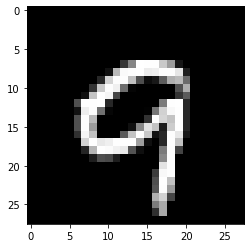

In [32]:
print('True Label: ',y_test[IMG_NUM])
print('Predicted Label: ',predictions)
plt.imshow(x_test[IMG_NUM].reshape(28,28), cmap = 'gray');

We can post multiple requests as well.  
Let's try with 5 images.

In [33]:
# picking up a random image from the test set for prediction
IMG_NUM = np.random.randint(0, len(x_test), 5)
json_data = json.dumps({"signature_name": "serving_default", "instances": x_test[[IMG_NUM]].tolist()})

/tmp/ipykernel_252684/3726529862.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  json_data = json.dumps({"signature_name": "serving_default", "instances": x_test[[IMG_NUM]].tolist()})


In [34]:
for idx in IMG_NUM:
    label = y_test[idx]
    print('The label is ', label)

The label is  3
The label is  2
The label is  5
The label is  9
The label is  2


In [35]:
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/mnist_digit:predict', data=json_data, headers=headers)

predictions = json.loads(json_response.text)['predictions']
for pred in predictions:
    prediction = np.array(pred).argmax()
    print('The predicted result is ', prediction)

The predicted result is  3
The predicted result is  2
The predicted result is  5
The predicted result is  9
The predicted result is  2


We can see that we are able to get it right with multiple predictions as well!

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=689f26ff-13bf-4496-9e46-e7b1ce7968de' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>